# 回归 源于 最佳拟合

表示要找到最佳拟合数据集

经典的阶跃函数由于其在0处的特殊性
会非常难以处理，因此使用sigmoid函数代替阶跃函数

In [41]:
#梯度上升算法  类似于梯度下降算法

from numpy import *

laptop_path_test='D:/PythonCode/Machine/machinelearninginaction/Ch05/'
desktop_path_test='D:/PythonCode/machinelearninginaction/Ch05/'
def loadDataSet():
    dataMat=[];labelMat=[]
    fr=open(desktop_path_test+'testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        #一共x0，x1，x2三个值输入数据列表中 ，x0默认为1.0
        labelMat.append(int(lineArr[2]))#标签
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#梯度上升算法
def gradAscent(dataMatIn,classLabels):
    #转换为Numpy矩阵数据类型
    dataMatrix=mat(dataMatIn)#100*3
    lableMat=mat(classLabels).transpose()#这里是转置的意思
    m,n=shape(dataMatrix)
    print('m',m,'n',n)
    alpha=0.001
    maxCycles=500#迭代次数
    weights=ones((n,1))
    print(weights)
    #矩阵相乘
    for  k  in range(maxCycles):
        h=sigmoid(dataMatrix*weights)
        error=(lableMat-h)#error 为100*1矩阵
        if k==1:
            print(error)
        weights=weights+alpha*dataMatrix.transpose()*error#dataMatrix转置*error
    return weights

In [42]:
dataArr,labelMat=loadDataSet()
weights=gradAscent(dataArr,labelMat)

m 100 n 3
[[ 1.]
 [ 1.]
 [ 1.]]
[[ -9.99593756e-01]
 [  1.33712671e-01]
 [ -9.68232381e-01]
 [ -9.59164382e-01]
 [ -9.98862180e-01]
 [  8.04858960e-03]
 [ -9.99606869e-01]
 [  1.30270875e-01]
 [ -9.97945631e-01]
 [ -9.97598129e-01]
 [  5.60475458e-03]
 [ -9.99836910e-01]
 [  2.49254953e-02]
 [ -9.74781773e-01]
 [  3.86483117e-02]
 [  6.56585191e-02]
 [  1.90094259e-02]
 [  9.60658897e-02]
 [  2.71526370e-01]
 [  8.40551332e-03]
 [  1.10709405e-02]
 [  7.25730391e-01]
 [ -9.97867652e-01]
 [  5.49084951e-01]
 [  4.55008729e-01]
 [ -9.98938150e-01]
 [ -9.90851537e-01]
 [  9.67893094e-01]
 [  4.76595412e-02]
 [ -9.99135780e-01]
 [  7.36595132e-02]
 [  3.82921491e-03]
 [ -9.99600685e-01]
 [  8.22873864e-01]
 [  1.03785901e-02]
 [ -9.97251891e-01]
 [ -9.97485063e-01]
 [ -9.77377793e-01]
 [ -9.95480462e-01]
 [ -9.95135005e-01]
 [  1.05687597e-01]
 [  6.90225018e-03]
 [ -9.95481173e-01]
 [  8.59813015e-02]
 [  4.37477824e-02]
 [ -9.92593750e-01]
 [  6.82642129e-01]
 [  1.66150724e-02]
 [ -9.96

In [45]:
#画出数据集和逻辑回归最佳拟合直线
import matplotlib.pyplot as plt
def plotBestFit(wei):
   
    weights = wei.getA()
    dataMat,labelMat=loadDataSet()
    dataArr=array(dataMat)
    n=shape(dataArr)[0]#行
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    #画散点图
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=arange(-3.0,3.0,0.1)#创建等差数组
    #最佳拟合直线
    #x=x.reshape(1,-1)
    y=(-weights[0]-weights[1]*x)/weights[2]
    
    print(x.shape,y.shape)
    #画直线a*x+b*y+c=0
    ax.plot(x,y)
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()
    

(60,) (60,)


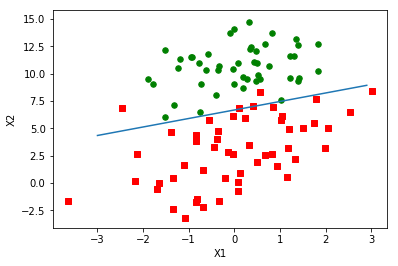

In [47]:
plotBestFit(weights)